In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# define dataset
X, y = make_classification(n_samples=5000,n_features=2, n_redundant=0, weights=[.99], n_informative=2,
                             n_clusters_per_class=1)

In [ ]:
X

array([[ 0.53106153, -1.298923  ],
       [ 1.38862462, -0.2343664 ],
       [ 0.98548572, -0.91438785],
       ...,
       [-0.789941  , -0.82842361],
       [ 0.72678866, -1.54165949],
       [ 1.01212917, -1.22984462]])

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

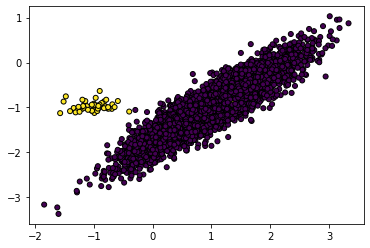

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [ ]:
from collections import Counter
counter = Counter(y)
counter

Counter({0: 4937, 1: 4937})

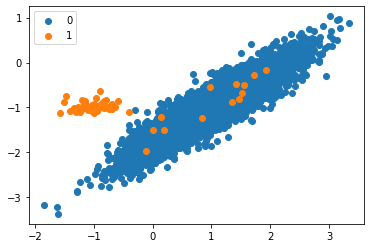

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 4937, 1: 4937})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


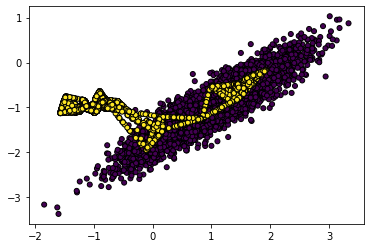

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [ ]:
# define dataset
X_, y_ = make_classification(n_samples=2500,n_features=2, n_redundant=0, weights=[.99], n_informative=2,
                             n_clusters_per_class=1)

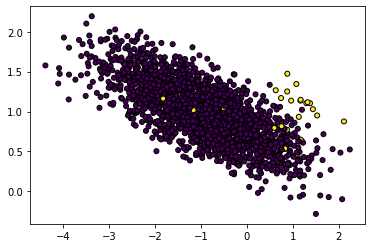

In [ ]:
plt.scatter(X_[:, 0], X_[:, 1], marker='o', c=y_,
            s=25, edgecolor='k')

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_, y_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


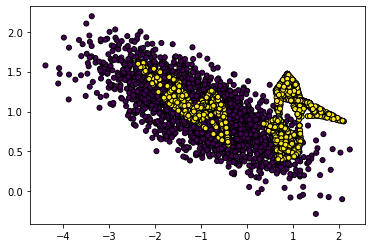

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()
x_ada , Y_ada = ada.fit_resample(X_,y_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


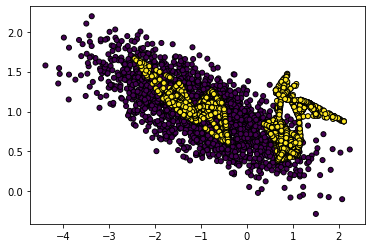

In [ ]:
plt.scatter(x_ada[:, 0], x_ada[:, 1], marker='o', c=Y_ada,
            s=25, edgecolor='k')

In [1]:
!unzip -q "/content/drive/My Drive/Colab Notebooks/fake_true_news.zip" -d "/content/drive/My Drive/Colab Notebooks/dataset/"

In [2]:
import pandas as pd

fake_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/Fake.csv")
true_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/True.csv")

In [6]:
#add labels to fake data
fake_df["label"] = ["fake"]*fake_df.shape[0]
fake_df.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake


In [7]:
#add labels to real data
true_df["label"] = ["real"]*true_df.shape[0]
true_df.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real


In [9]:
data = pd.concat([fake_df[:100],true_df[:10]])

In [10]:
data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",real
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",real
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",real
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",real


In [11]:
from collections import Counter

counter = Counter(data["label"])
counter

Counter({'fake': 100, 'real': 10})

In [19]:
list(data.iloc[:,:-1]["text"])

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = list(data.iloc[:,:-1]["text"])

vectorizer = TfidfVectorizer()

vectorizer.fit(text)

print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'donald': 1992, 'trump': 6256, 'just': 3392, 'couldn': 1564, 'wish': 6641, 'all': 472, 'americans': 512, 'happy': 2849, 'new': 4149, 'year': 6717, 'and': 528, 'leave': 3566, 'it': 3277, 'at': 688, 'that': 6082, 'instead': 3201, 'he': 2887, 'had': 2810, 'to': 6162, 'give': 2693, 'shout': 5549, 'out': 4360, 'his': 2951, 'enemies': 2186, 'haters': 2875, 'the': 6084, 'very': 6427, 'dishonest': 1928, 'fake': 2363, 'news': 4153, 'media': 3855, 'former': 2553, 'reality': 4986, 'show': 5551, 'star': 5782, 'one': 4300, 'job': 3337, 'do': 1972, 'as': 644, 'our': 4356, 'country': 1573, 'rapidly': 4957, 'grows': 2786, 'stronger': 5862, 'smarter': 5646, 'want': 6501, 'of': 4260, 'my': 4079, 'friends': 2595, 'supporters': 5926, 'even': 2255, 'healthy': 2896, 'president': 4729, 'angry': 537, 'pants': 4421, 'tweeted': 6285, '2018': 197, 'will': 6619, 'be': 814, 'great': 2758, 'for': 2533, 'america': 507, 'realdonaldtrump': 4985, 'december': 1738, '31': 222, '2017trump': 179, 'tweet': 6284, 'went': 65

In [26]:
vector_list = vectorizer.transform(text)

<1x6753 sparse matrix of type '<class 'numpy.float64'>'
	with 248 stored elements in Compressed Sparse Row format>

In [32]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(vector_list, pd.Categorical(data.iloc[:,-1]).rename_categories([0,1]))
counter = Counter(y)
print(counter)

Counter({0: 100, 1: 100})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [42]:
pd.DataFrame(X[0:5].toarray(), columns=vectorizer.get_feature_names()).iloc[:,500:1000]

,amazing,amazon,ambassador,amen,amend,amendment,amendments,america,americafirstpol,americafirstpolicies,american,american_bridge,americans,amjoy,among,amount,amounts,amplifying,amusement,amy,amzn,an,analogy,analysis,analyst,analyzes,anarchy,anchor,and,anderson,andrew,angela,angeline,anger,angered,angerer,angle,angry,angryhatter,anholt,...,book,booming,boost,boot,booted,bootgate,border,borders,born,bornwithatail_,borrow,borrowing,boss,bossert,bossie,both,bother,bothering,bothers,bottle,bottom,bought,bounds,bouquets,bowed,boy,boycotts,boyfriend,boys,brace,bracelet,bracing,brag,bragged,bragging,brain,brainiac,brand,brands,brass
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.05815,0.0,0.0,0.018314,0.0,0.024839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.116907,0.0,0.027406,0.0,0.0,0.0,0.0,0.0,0.0,0.035777,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.064829,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.073899,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114769,0.0,0.0,0.073476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010528,0.000000,0.0,0.0,0.0,0.0,0.0,0.064018,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013128,0.000000,0.0,0.0,0.0,0.0,0.0,0.059874,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.056392,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044770,0.056392,0.0,0.0,0.0,0.0,0.0,0.158808,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056392,0.051834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
pd.DataFrame(X[95:100].toarray(), columns=vectorizer.get_feature_names()).iloc[:,500:1000]

,amazing,amazon,ambassador,amen,amend,amendment,amendments,america,americafirstpol,americafirstpolicies,american,american_bridge,americans,amjoy,among,amount,amounts,amplifying,amusement,amy,amzn,an,analogy,analysis,analyst,analyzes,anarchy,anchor,and,anderson,andrew,angela,angeline,anger,angered,angerer,angle,angry,angryhatter,anholt,...,book,booming,boost,boot,booted,bootgate,border,borders,born,bornwithatail_,borrow,borrowing,boss,bossert,bossie,both,bother,bothering,bothers,bottle,bottom,bought,bounds,bouquets,bowed,boy,boycotts,boyfriend,boys,brace,bracelet,bracing,brag,bragged,bragging,brain,brainiac,brand,brands,brass
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.136274,0.0,0.0,0.0,0.0,0.0,0.0,0.124300,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.057972,0.0,0.0,0.0,0.0,0.0,0.0,0.066098,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044763,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.04091,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.043290,0.0,0.0,0.0,0.0,0.0,0.0,0.065810,0.0,0.0,0.0,0.0,0.0,0.0,0.037033,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050121,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.050121,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.03095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.018566,0.0,0.0,0.0,0.0,0.0,0.0,0.084673,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040029,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.096622,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.044992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
